# Загрузка Pandas и очистка данных

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from random import choice

In [2]:
df_main = pd.read_csv('main_task.csv')
df_test = pd.read_csv('kaggle_task.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [3]:
# Ваш код по очистке данных и генерации новых признаков
# При необходимости добавьте ячейки

In [4]:
df_main['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

df = df_test.append(df_main, sort=False).reset_index(drop=True) # объединяем

In [5]:
df_test

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,id_9995,London,"['Caribbean', 'Barbecue', 'Jamaican', 'Vegetar...",4367.0,$,28.0,[['By far best Chicken burgers and wings in L....,/Restaurant_Review-g186338-d11916827-Reviews-C...,d11916827,0,0
9996,id_9996,Lisbon,"['Indian', 'Asian', 'Nepali', 'Bangladeshi']",2612.0,$$ - $$$,2.0,"[['Ok indian food'], ['11/25/2017']]",/Restaurant_Review-g189158-d12701633-Reviews-C...,d12701633,0,0
9997,id_9997,Milan,NaN,5562.0,NaN,2.0,"[[], []]",/Restaurant_Review-g187849-d13198194-Reviews-Q...,d13198194,0,0
9998,id_9998,Milan,['Italian'],4010.0,NaN,2.0,"[[], []]",/Restaurant_Review-g187849-d3862815-Reviews-La...,d3862815,0,0


In [6]:
df.head()

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0


- Restaurant_id — идентификационный номер ресторана / сети ресторанов;
- City — город, в котором находится ресторан;
- Cuisine Style — кухня или кухни, к которым можно отнести блюда, предлагаемые в ресторане;
- Ranking — место, которое занимает данный ресторан среди всех ресторанов своего города;
- Rating — рейтинг ресторана по данным TripAdvisor (именно это значение должна будет предсказывать модель);
- Price Range — диапазон цен в ресторане;
- Number of Reviews — количество отзывов о ресторане;
- Reviews — данные о двух отзывах, которые отображаются на сайте ресторана;
- URL_TA — URL страницы ресторана на TripAdvisor;
- ID_TA — идентификатор ресторана в базе данных TripAdvisor.

## Первичный анализ данных

In [7]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [8]:
df.isnull().sum() # Пустые значения присутствуют в 4 столбцах

Restaurant_id            0
City                     0
Cuisine Style        11590
Ranking                  0
Price Range          17361
Number of Reviews     3200
Reviews                  2
URL_TA                   0
ID_TA                    0
sample                   0
Rating                   0
dtype: int64

In [9]:
df.nunique()

Restaurant_id        13094
City                    31
Cuisine Style        10731
Ranking              12975
Price Range              3
Number of Reviews     1573
Reviews              41857
URL_TA               49963
ID_TA                49963
sample                   2
Rating                  10
dtype: int64

Посмотрим на численные значения более подробно

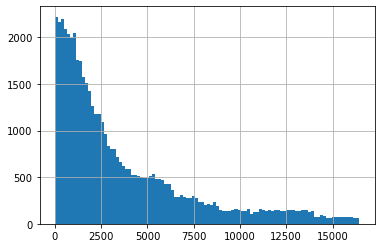

In [10]:
df['Ranking'].hist(bins=100)

По распределению видим, что большинство рестаранов входят в топ 2500 в своем городе. Явных выбросов нет

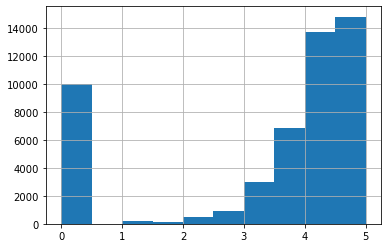

In [11]:
df['Rating'].hist()

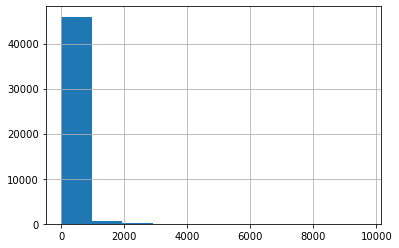

In [12]:
df['Number of Reviews'].hist()

На гистограмме есть большие значения, которые сильно отличаются от всего распределения. Возможно это выбросы?

In [13]:
df['Number of Reviews'].max()

9660.0

In [14]:
df[df['Number of Reviews'] == df['Number of Reviews'].max()]

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
29251,id_375,London,"['British', 'Vegetarian Friendly', 'Gluten Fre...",376.0,$$$$,9660.0,"[['Lovely setting and decent food', 'A Christm...",/Restaurant_Review-g186338-d1421189-Reviews-Lo...,d1421189,1,4.0


Ресторан с таким большим кол-вом отзывов находится в топ 376 в своем городе, возможно это просто хорошее место с большим потоком посетителей. Оставим все как есть

In [15]:
df['City'].unique() # Посмотрим, чтобы названия городов были коректно записаны

array(['Paris', 'Helsinki', 'Edinburgh', 'London', 'Bratislava', 'Lisbon',
       'Budapest', 'Stockholm', 'Rome', 'Milan', 'Munich', 'Hamburg',
       'Prague', 'Vienna', 'Dublin', 'Barcelona', 'Brussels', 'Madrid',
       'Oslo', 'Amsterdam', 'Berlin', 'Lyon', 'Athens', 'Warsaw',
       'Oporto', 'Krakow', 'Copenhagen', 'Luxembourg', 'Zurich', 'Geneva',
       'Ljubljana'], dtype=object)

Вроде все нормально, явных дубликатов или некоректных городов нет

In [16]:
cities = set() # Множество всех городов

for city in df['City']:
    cities.add(city)

Запишим города в список, он нам пригодится позже

In [17]:
df['City'].value_counts()

London        7193
Paris         6108
Madrid        3813
Barcelona     3395
Berlin        2705
Milan         2694
Rome          2589
Prague        1816
Lisbon        1647
Vienna        1443
Amsterdam     1372
Brussels      1314
Hamburg       1186
Munich        1145
Lyon          1126
Stockholm     1033
Budapest      1021
Warsaw         925
Dublin         836
Copenhagen     819
Athens         776
Edinburgh      745
Zurich         685
Oporto         642
Geneva         590
Krakow         554
Oslo           488
Helsinki       475
Bratislava     380
Luxembourg     263
Ljubljana      222
Name: City, dtype: int64

Учитывая, что города разные по размерам, скорее всего 400ый по рейтингу ресторан в Лондоне намного лучше 400ого ресторана в Люксембурге. Попробуем сделать признак из этого.

Запишим максимальные значения рейтингов по городу в словарь

In [18]:
max_rank = {} # Словаь для значений рейтинга

for city in cities:
    rank = (df[df['City'] == city].Ranking.max())
    max_rank[city] = rank

In [19]:
def rank_in_city(rank, city):  
    '''Функция возвращает процент в который входит ресторан среди лучших в своем городе.'''
    return rank / max_rank[city]
df['Rank in City'] = df.apply(lambda x: rank_in_city(x['Ranking'], x['City']), axis=1)

In [20]:
df['Rank in City'] # Рейтинг ресторана относительно размера города, чем меньше значение тем лучше

0        0.926855
1        0.092901
2        0.458664
3        0.101496
4        0.041620
           ...   
49995    0.079681
49996    0.453382
49997    0.670455
49998    0.297586
49999    0.769243
Name: Rank in City, Length: 50000, dtype: float64

Поработаем с колонкой кол-во отзывов
- Проверим действительно ли пропущенное значение это отсутсвие отзывов
- Если в колонке с отзывами будет какая-либо запись, то заменим пустое значение на среднее кол-во отзывов в городе


Сохраним пустые значения в новую колонку, заменив их '1'

In [21]:
def nan_to_one(string):
    '''Функция заменяет пустое значение на 1, в обратном случае возвращает 0'''    
    if pd.isnull(string) == True:
        return 1
    else:
        return 0

df['Number of Reviews_NAN'] = df['Number of Reviews'].apply(nan_to_one)   

Заменим пустые значения в колонке количество отзывов на 0, чтобы было удобнее работать с ней

In [22]:
def nan_to_zero(string):
    '''Функция заменяет пустое значение на 0'''    
    if pd.isnull(string) == True:
        return 0
    else:
        return string

df['Number of Reviews'] = df['Number of Reviews'].apply(nan_to_zero)   

Так же в колонке отзывов, заменим явные пустые значения на 0

In [23]:
def zero_reviews(string):
    '''Функция возвращает 0, если отсутсвует отзыв в колонке Reviews'''
    if string == '[[], []]' or pd.isnull(string):
        return 0
    else:
        return string
df['Reviews'] = df['Reviews'].apply(zero_reviews)    

Заменим 0 на среднее кол-во отзывов в городе

In [24]:
mean_n_r = {} # Словарь со средним кол-вом отзывов в городе 

for city in cities:
    mean = round(df['Number of Reviews'][df['City'] == city].mean())
    mean_n_r[city] = mean

In [25]:
def zero_number_of_reviews_true(amount_reviews, review, city):
    '''Фунцкия заменяет нулевое кол-во отзывов на среднее, если есть отзывы в колонке Review'''
    if amount_reviews == 0 and review !=0:
        return mean_n_r[city]
    else: 
        return amount_reviews

df['Number of Reviews'] = df.apply(lambda x: zero_number_of_reviews_true(x['Number of Reviews'], x['Reviews'], x['City']), axis=1)

Попробуем добавить информацию по городам

Создадим новый столбец, показывающий являеется ли город столицей

In [26]:
# Столицы стран
capital = ['Lisbon', 'Warwaw', 'Rome', 'Ljubljana', 'Dublin', 'Amsterdam', 'Brussels', 'Prague',\
                 'Oporto', 'Helsinki', 'Copenhagen', 'Stockholm', 'Athens', 'Bratislava', 'Edinburgh',\
                 'Budapest', 'Paris', 'Berlin', 'Vienna', 'London', 'Madrid', 'Lisbon', 'Oslo', 'Luxembourg'] 

def is_capital(city):
    '''Функция возвращает 1, если это столица и 0 если нет'''
    if city in capital:
        return 1
    else: 
        return 0

df['Is Capital'] = df['City'].apply(is_capital)        

А так же столбец с численностью города

In [27]:
# Численность насления городов
city_size = {'Vienna': 1897000,
             'Paris': 2148000,
             'Amsterdam': 821752,
             'Athens': 664046,
             'Barcelona': 5575000,
             'Berlin': 3769000,
             'Bratislava': 424428,
             'Brussels': 174383,
             'Budapest': 1752000,
             'Copenhagen': 602481,
             'Dublin': 1388000,
             'Edinburgh': 482005,
             'Geneva': 499480,
             'Hamburg': 1845000,
             'Helsinki': 631695,
             'Krakow': 779115,
             'Lisbon': 504718,
             'Ljubljana': 279631 ,
             'London': 8982000,
             'Luxembourg': 214000,
             'Lyon': 513275,
             'Madrid': 6642000,
             'Milan': 1352000,
             'Munich': 1472000,
             'Oporto': 214349,
             'Oslo': 681067,
             'Prague': 1309000,
             'Rome': 2873000,
             'Stockholm': 975904,
             'Warsaw': 1708000,
             'Zurich': 428000 
}  

def city_sizes(city):
    '''Функция возвращает численость города'''
    return city_size[city]

df['City Size'] = df['City'].apply(city_sizes)  

Создадим столбец в котором будут города, где есть рестораны со звездами мишлен

In [28]:
# Список городов, где есть ресторан(ы) со звездами мишлен
michlen_cities = ['London', 'Luxembourg', 'Copenhagen', 'Paris', 'Barcelona', 'Madrid', 'Rome', 'Oslo'] 

def michlen(city):
    '''Функция возвращает 1, если в этом городе есть рестораны со звездами мишлен,
    в противном случае 0 '''
    if city in michlen_cities:
        return 1
    else: 
        return 0
    
df['Michlen'] = df['City'].apply(is_capital) 

Посмотрим на столбец с видами кухонь

In [29]:
df['Cuisine Style'].value_counts()

['Italian']                                                                                                                                                   1332
['French']                                                                                                                                                    1019
['Spanish']                                                                                                                                                    860
['French', 'European']                                                                                                                                         503
['Cafe']                                                                                                                                                       500
                                                                                                                                                              ... 
['Japanese', 'American

Его лучше преобразовать в списки кухонь

In [30]:
cuisines = set() # Множество всех видов кухонь
for string in df['Cuisine Style'].dropna():
    splitted = re.findall('\w+\s\W\s\w+|\w+\s\w+\s\w+|\w+\s\w+|\w+', string)    
    for cuisine in splitted:
        cuisines.add(cuisine)
len(cuisines) # Количество разных кухонь

125

In [31]:
def separation_cuisine(string):
    '''Функция заменяет пустые значения на other, а так же создает список кухонь для каждого реторана'''
    if pd.isnull(string):
        string = 'Other'
    return re.findall('\w+\s\W\s\w+|\w+\s\w+\s\w+|\w+\s\w+|\w+', string)
df['Cuisine Style'] = df['Cuisine Style'].apply(separation_cuisine)

Создадим пару признаков на основе этих списков
- количество кухонь в ресторане 
- среднее кол-во кухонь в ресторане в данном городе

In [32]:
def len_cuisine(cuisines):
    '''Функция возвращает кол-во кухонь в ресторане'''
    return len(cuisines)

df['Len of Cuisine'] = df['Cuisine Style'].apply(len_cuisine)

In [33]:
mean_cuisine = {} # Словарь со средними значениями кол-ва кухонь в ресторане по городам
for city in cities:
    len_cuisine = df['Len of Cuisine'][df['City'] == city].mean()
    mean_cuisine[city] = len_cuisine

def mean_len(city):
    '''Функция возвращает среднее кол-во кухонь в ресторане для города'''
    return round(mean_cuisine[city])

df['Mean Amount Of Cuisine'] = df['City'].apply(mean_len)

Посмотрим на колонку с отзывами, до этого мы заменили пустые значения на 0

Отделим дату и создадим отдельный столбец с кол-вом дней прощедших между отзывами

In [34]:
def separation_date(string):
    '''Функция возвращает дату(ы) из строки отзывов'''
    if string == 0:
        return 0
    return re.findall('\d{2}/\d{2}/\d{4}', string)
df['Reviews Dates'] = df['Reviews'].apply(separation_date)

In [35]:
def to_datetime(lst):
    '''Функция преобразует время в формат datatime'''
    if lst == 0:
        return 0
    for value,date in enumerate(lst):
        if len(lst) == 1:
            return pd.to_datetime(date), 0
        else:
            if value == 0:
                date1 = pd.to_datetime(date)
            if value == 1:    
                date2 = pd.to_datetime(date)
                return date1, date2

df['Reviews Dates'] = df['Reviews Dates'].apply(to_datetime)


In [36]:
def days(time):
    '''Функция возвращает кол-во дней, прощедших между последними отзывами'''
    if time == 0:
        return 0
    for value,date in enumerate(time):
        if 0 in time:
            return 1
        else:
            if value == 0:
                date1 = date
            if value == 1:
                date2 = date
                return (date1 - date2).days

df['Days Beetwen Reviews'] = df['Reviews Dates'].apply(days)

Оставшиеся данные в столбце отзывы, это именно отзывы, поэтому эта колонка в будущем нам не понадобится 

Посмотрим на столбец со средней ценой в ресторане

In [38]:
df['Price Range'].unique() # Эти значения будет перевести в числовой вид и избавиться от пропусков

array(['$$ - $$$', '$$$$', '$', nan], dtype=object)

In [39]:
df['Price Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

In [40]:
def symbols_to_numbers(symbol):
    '''Функция преобразует символы в численные значения и заменяет пустые значения на среднее'''
    if symbol == '$':
        return 1
    if symbol == '$$ - $$$':
        return 2.5 
    if symbol == '$$$$':
        return 4
    if pd.isnull(symbol) == True:
        return 2.5 # Будем считать это средним значением

    
df['Price Range'] = df['Price Range'].apply(symbols_to_numbers)
df['Price Range'].value_counts()

2.5    40402
1.0     7816
4.0     1782
Name: Price Range, dtype: int64

Теперь эти значения подходят для модели

Построим матрицу корреляции, и по ее значениям отберем колонки для модели

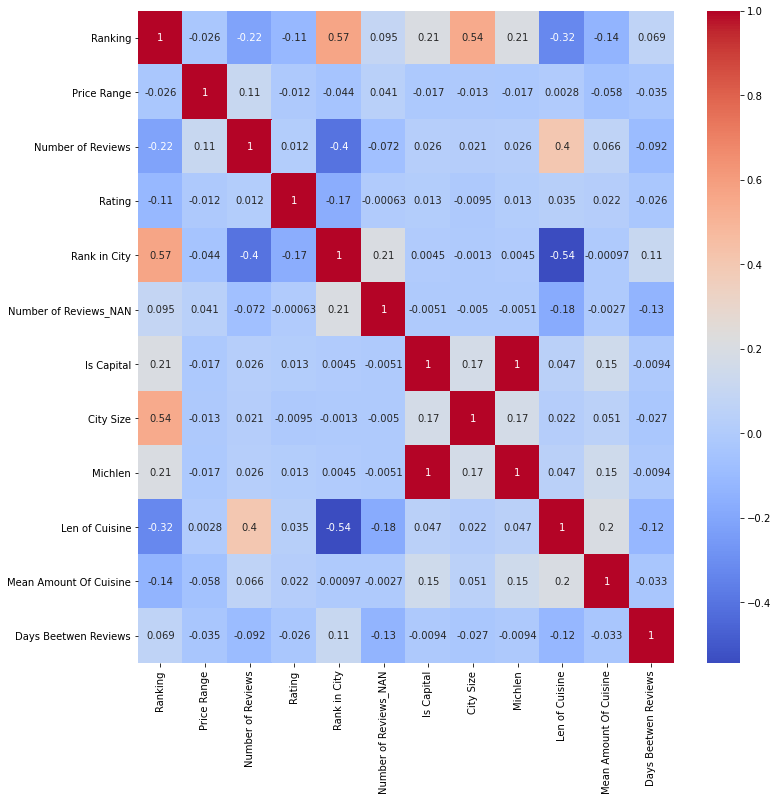

In [41]:
sns.heatmap(df.drop(['sample'], axis=1).corr(), annot=True, cmap='coolwarm')
plt.gcf().set_size_inches(12, 12)

По матрице корреляции видно, что сильно скоррелированны признаки о столице и о том в каком городе находится рестораны со звездой мишлен. Возможно просто совпадение, но думаю, что от одного из них лучше избавиться. Сильно скоррелированных признаков больше нет, поэтому оставляем их для модели. Так же видим, что с целевой переменной очень слабо скоррелированы размер города и пустые значения в колонке кол-во отзывов. Их можно тоже не включать в модель

Удалим ненужные столбцы

In [42]:
df_preproc = df.drop(['Restaurant_id', 'Reviews', 'URL_TA', 'ID_TA', 'Reviews Dates', 'Michlen', 'City Size', 'Number of Reviews_NAN'], axis = 1)
df_preproc

,City,Cuisine Style,Ranking,Price Range,Number of Reviews,sample,Rating,Rank in City,Is Capital,Len of Cuisine,Mean Amount Of Cuisine,Days Beetwen Reviews
0,Paris,"[Bar, Pub]",12963.0,2.5,4.0,0,0.0,0.926855,1,2,2,0
1,Helsinki,"[European, Scandinavian, Gluten Free Options, ...",106.0,2.5,97.0,0,0.0,0.092901,1,5,3,37
2,Edinburgh,[Vegetarian Friendly],810.0,2.5,28.0,0,0.0,0.458664,1,1,4,22
3,London,"[Italian, Mediterranean, European, Vegetarian ...",1669.0,4.0,202.0,0,0.0,0.101496,1,5,3,14
4,Bratislava,"[Italian, Mediterranean, European, Seafood, Ve...",37.0,4.0,162.0,0,0.0,0.041620,1,6,2,15
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Milan,"[Italian, Vegetarian Friendly, Vegan Options, ...",500.0,2.5,79.0,1,4.5,0.079681,0,4,2,34
49996,Paris,"[French, American, Bar, European, Vegetarian F...",6341.0,2.5,542.0,1,3.5,0.453382,1,5,2,9
49997,Stockholm,"[Japanese, Sushi]",1652.0,2.5,4.0,1,4.5,0.670455,1,2,3,3127
49998,Warsaw,"[Polish, European, Eastern European, Central E...",641.0,2.5,70.0,1,4.0,0.297586,0,5,3,23


Используем dummy variables для столбцов города и видов кухонь

In [43]:
df_preproc = pd.get_dummies(df_preproc, columns=['City'], dummy_na=True)

In [44]:
df_preproc = df_preproc.join(pd.get_dummies(df_preproc['Cuisine Style'].apply(pd.Series).stack()).sum(level=0))

In [45]:
df_preproc = df_preproc.drop(['Cuisine Style'], axis=1)

In [46]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 168 entries, Ranking to Yunnan
dtypes: float64(5), int64(5), uint8(158)
memory usage: 11.3 MB


Видим, что все столбцы в нужном нам формате, т.е числовом.

# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [47]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

In [48]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [49]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [50]:
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 167), (40000, 167), (40000, 166), (30000, 166), (10000, 166))

# Создаём, обучаем и тестируем модель

In [51]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [52]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [53]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.2122305


Посмотрим какие признаки оказались самые значимые для модели

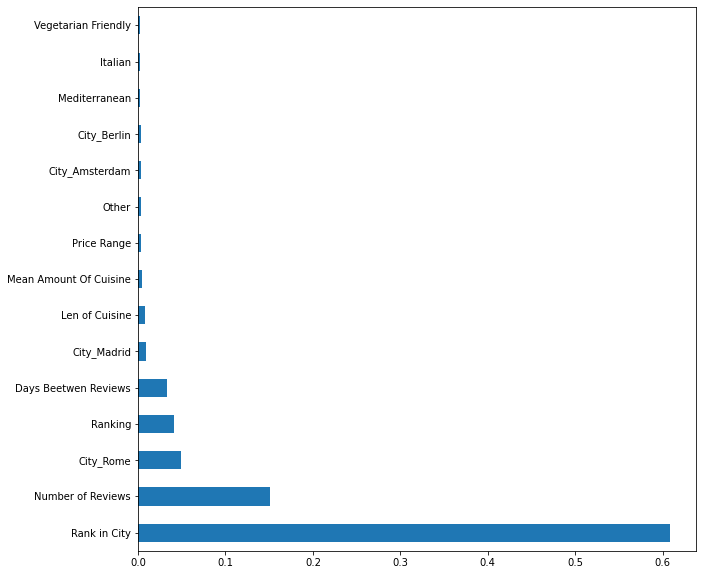

In [54]:
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

In [55]:
test_data.sample(10)

,Ranking,Price Range,Number of Reviews,Rating,Rank in City,Is Capital,Len of Cuisine,Mean Amount Of Cuisine,Days Beetwen Reviews,City_Amsterdam,...,Ukrainian,Uzbek,Vegan Options,Vegetarian Friendly,Venezuelan,Vietnamese,Welsh,Wine Bar,Xinjiang,Yunnan
7452,4267.0,2.5,30.0,0.0,0.305091,1,1,2,196,0,...,0,0,0,0,0,0,0,0,0,0
4365,3378.0,2.5,2.0,0.0,0.530132,1,1,2,0,0,...,0,0,0,0,0,0,0,0,0,0
2976,8167.0,2.5,25.0,0.0,0.927120,1,3,2,0,0,...,0,0,0,0,0,0,0,0,0,0
6572,4260.0,1.0,56.0,0.0,0.304590,1,3,2,40,0,...,0,0,0,1,0,0,0,0,0,0
5640,2656.0,2.5,27.0,0.0,0.301510,1,2,2,0,0,...,0,0,0,0,0,0,0,0,0,0
3588,2.0,2.5,1092.0,0.0,0.001608,0,6,3,1,0,...,0,0,0,1,0,0,0,0,0,0
8817,2396.0,2.5,86.0,0.0,0.972403,1,4,3,18,0,...,0,0,0,0,0,0,0,0,0,0
4485,2725.0,2.5,0.0,0.0,0.791231,1,3,3,0,0,...,0,0,0,0,0,0,0,0,0,0
3202,972.0,1.0,100.0,0.0,0.069498,1,4,2,93,0,...,0,0,0,1,0,0,0,0,0,0
6487,401.0,2.5,159.0,0.0,0.062932,1,3,2,31,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
test_data = test_data.drop(['Rating'], axis=1)

In [57]:
sample_submission

,Restaurant_id,Rating
0,id_0,3.0
1,id_1,4.0
2,id_2,4.5
3,id_3,4.5
4,id_4,4.5
...,...,...
9995,id_9995,4.5
9996,id_9996,4.0
9997,id_9997,3.0
9998,id_9998,4.0


In [58]:
predict_submission = regr.predict(test_data)

In [59]:
predict_submission

array([3.095, 4.255, 4.365, ..., 3.035, 4.355, 4.29 ])

In [60]:
sample_submission['Rating'] = predict_submission
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.095
1,id_1,4.255
2,id_2,4.365
3,id_3,4.340
4,id_4,4.500
5,id_5,4.320
6,id_6,1.070
7,id_7,2.885
8,id_8,4.180
9,id_9,4.605


Скоректируем результаты, так как рейтинг ресторанов может быть только целым числом либо целым с дробной частью 0.5

In [61]:
def round_submission(number):
    '''Функция округляет значения до 0,5'''
    return int(number/0.5+0.5) * 0.5

sample_submission['Rating'] = sample_submission['Rating'].apply(round_submission)

In [62]:
sample_submission

,Restaurant_id,Rating
0,id_0,3.0
1,id_1,4.5
2,id_2,4.5
3,id_3,4.5
4,id_4,4.5
...,...,...
9995,id_9995,4.5
9996,id_9996,4.0
9997,id_9997,3.0
9998,id_9998,4.5


Это итоговый результат, его отправляем на kaggle

In [64]:
#sample_submission.to_csv('sample_submission.csv',index=False)